# Inferencia Sugeno - Gradiente Descendente
Utilizando o metodo do gradiente descendente para aproximar a saída para f(x)=x^2

## Autores
Renan Mateus Bernado do Nascimento
<br>Nícolas Arruda Maduro

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from abc import ABCMeta, abstractmethod

In [3]:
class PertinenceFunction:
    __metaclass__ = ABCMeta

    @abstractmethod
    def out(self): pass

In [4]:
class LineInput(PertinenceFunction):
    def __init__(self,a,b):
        self.a=a
        self.b=b
    def out(self,x):
        y=self.a*x+self.b
        if y>1:
            return 1
        elif y<=0:
            return 0.001
        else:
            return y

In [5]:
class GuassianInput(PertinenceFunction):
    def __init__(self,mu,sigma):
        self.mu=mu
        self.sigma=sigma
    def out(self,x):
        return np.exp(-(0.5)*pow((x-self.mu)/self.sigma, 2))

In [6]:
class IpsilonFunc:
    def __init__(self, p, q):
        self.p = p
        self.q = q
        
    def out(self, x):
        return self.p*x + self.q

In [7]:
def plotGraph(xValues, yValues,title,ylabel,xlabel,name1,name2):
    if name2=="":
        plt.plot(yValues, label=name1)
    else:
        plt.plot(xValues,yValues[0],label=name1)
        plt.plot(xValues,yValues[1],label=name2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [28]:
class GradientDescent:
    
    def __init__(self, domain, input_size, learning_rate, yRange, iteration,inputs_type,input1Range,input2Range):
        self.domain = domain
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.y1 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.y2 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.input = []
        self.output = []
        self.predOutput = []
        self.iteration = iteration
        self.error_iteration = []
        self.inputs_type=inputs_type
        if (self.inputs_type=="line"):
            self.funcPert1=LineInput(-0.25,0.5)#  random.uniform(input1Range[0], input1Range[1]), random.uniform(input2Range[0], input2Range[1]))
            self.funcPert2=LineInput(0.25,0.5)#random.uniform(input1Range[0], input1Range[1]), random.uniform(input2Range[0], input2Range[1]))
        elif (self.inputs_type=="gaussian"):  
            self.funcPert1=GuassianInput(random.uniform(input1Range[0], input1Range[1]), random.uniform(input2Range[0], input2Range[1]))
            self.funcPert2=GuassianInput(random.uniform(input1Range[0], input1Range[1]), random.uniform(input2Range[0], input2Range[1]))
        
        
    
    def squareFunc(self, x):
        return x**2
    
    
    ''' Initiates input randomly '''
    def initInput(self):
        self.input = [ random.uniform(domain[0], domain[1]) for i in range(0, self.input_size) ]
        self.input.sort()
        self.calcOutput()
            
    ''' Calculates output '''
    def calcOutput(self):
        self.output = [ self.squareFunc(x) for x in self.input ]
        
        
    ''' Calculates predicted output '''
    def calcPredictedOutput(self, x):
        num = self.y1.out(x)*self.funcPert1.out(x) + self.y2.out(x)*self.funcPert2.out(x)
        den = self.funcPert1.out(x)+self.funcPert2.out(x)
        
        return num/den
    
    
    def calcError(self, yDes, yPred):
        return 0.5*pow((yPred -yDes), 2)
    
    
    ''' Partial derivative Error -> p '''
    def pDErrorP(self, yDes, yPred, w, w1, w2, x):
        return (yPred -yDes)*(w/(w1+w2))*x
    
    
    ''' Partial derivative Error -> q '''
    def pDErrorQ(self, yDes, yPred, w, w1, w2):
        return (yPred -yDes)*(w/(w1+w2))
    
    ''' Partial derivative Error -> a '''
    def pDErrorA(self, yDes, yPred, w, w1, w2,y1,y2,x):
        return (yPred -yDes)*w*((y1-y2)/pow(w1+w2,2))*x
    
    ''' Partial derivative Error -> b '''
    def pDErrorB(self, yDes, yPred, w, w1, w2,y1,y2):
        return (yPred -yDes)*w*((y1-y2)/pow(w1+w2,2))
    
    ''' Partial derivative Error -> mu '''
    def pDErrorMu(self, yDes, yPred, w1, w2,y1,y2,gauss,x):
        return (yPred -yDes)*w1*w2*((y1-y2)/pow(w1+w2,2))*((x-gauss.mu)/pow(gauss.sigma,2))
    
    ''' Partial derivative Error -> sigma '''
    def pDErrorSigma(self, yDes, yPred, w1, w2,y1,y2,gauss,x):
        return (yPred -yDes)*w1*w2*((y1-y2)/pow(w1+w2,2))*(pow(x-gauss.mu,2)/pow(gauss.sigma,3))
    
    
    def run(self):        
        for i in range(0, iteration):
            self.initInput()
            error = []
            
            for i in range(0, self.input_size):
                
                x=self.input[i]
                yDes=self.output[i]
                yPred = self.calcPredictedOutput(x)
                error.append(self.calcError(yDes, yPred))
                pDErrorP_y1=self.pDErrorP(yDes, yPred, self.funcPert1.out(x), self.funcPert1.out(x), self.funcPert2.out(x), x)
                pDErrorP_y2=self.pDErrorP(yDes, yPred, self.funcPert2.out(x), self.funcPert1.out(x), self.funcPert2.out(x), x)
                pDErrorQ_y1=self.pDErrorQ(yDes, yPred, self.funcPert1.out(x), self.funcPert1.out(x), self.funcPert2.out(x))
                pDErrorQ_y2=self.pDErrorQ(yDes, yPred, self.funcPert2.out(x), self.funcPert1.out(x), self.funcPert2.out(x))
                if self.inputs_type=="gaussian":                    
                    pDErrorSigma_FP1=self.pDErrorSigma(yDes, yPred, self.funcPert1.out(x), self.funcPert2.out(x),self.y1.out(x),self.y2.out(x),self.funcPert1,x)
                    pDErrorSigma_FP2=self.pDErrorSigma(yDes, yPred, self.funcPert1.out(x), self.funcPert2.out(x),self.y2.out(x),self.y1.out(x),self.funcPert2,x)
                    pDErrorMU_FP1=self.pDErrorMu(yDes, yPred, self.funcPert1.out(x), self.funcPert2.out(x),self.y1.out(x),self.y2.out(x),self.funcPert1,x)
                    pDErrorMU_FP2=self.pDErrorMu(yDes, yPred, self.funcPert1.out(x), self.funcPert2.out(x),self.y2.out(x),self.y1.out(x),self.funcPert2,x)
                    
                    self.funcPert1.sigma = self.funcPert1.sigma -  self.learning_rate*pDErrorSigma_FP1
                    self.funcPert2.sigma = self.funcPert2.sigma -  self.learning_rate*pDErrorSigma_FP2
                    self.funcPert1.mu = self.funcPert1.mu -  self.learning_rate*pDErrorMU_FP1
                    self.funcPert2.mu = self.funcPert2.mu -  self.learning_rate*pDErrorMU_FP2
                
                elif self.inputs_type=="line":
                    a=1                
                   # pDErrorA_FP1=self.pDErrorA(yDes, yPred,self.funcPert2.out(x) ,self.funcPert1.out(x), self.funcPert2.out(x),self.y1.out(x),self.y2.out(x),x)
                   # pDErrorA_FP2=self.pDErrorA(yDes, yPred,self.funcPert1.out(x) ,self.funcPert1.out(x), self.funcPert2.out(x),self.y2.out(x),self.y1.out(x),x)
                   # pDErrorB_FP1=self.pDErrorB(yDes, yPred,self.funcPert2.out(x) ,self.funcPert1.out(x), self.funcPert2.out(x),self.y1.out(x),self.y2.out(x))
                   # pDErrorB_FP2=self.pDErrorB(yDes, yPred,self.funcPert1.out(x) ,self.funcPert1.out(x), self.funcPert2.out(x),self.y2.out(x),self.y1.out(x))
                    
                   # self.funcPert1.a = self.funcPert1.a -  self.learning_rate*pDErrorA_FP1
                   # self.funcPert2.a = self.funcPert2.a -  self.learning_rate*pDErrorA_FP2
                   # self.funcPert1.b = self.funcPert1.b -  self.learning_rate*pDErrorB_FP1
                   # self.funcPert2.b = self.funcPert2.b -  self.learning_rate*pDErrorB_FP2
                    
                self.y1.p = self.y1.p - self.learning_rate*pDErrorP_y1
                self.y2.p = self.y2.p - self.learning_rate*pDErrorP_y2
                self.y1.q = self.y1.q - self.learning_rate*pDErrorQ_y1
                self.y2.q = self.y2.q - self.learning_rate*pDErrorQ_y2
                
            
            self.error_iteration.append(sum(error))
            
        self.initInput()
        yPred=[]
        for i in range(0, self.input_size):
            yPred.append(self.calcPredictedOutput(self.input[i]))
        plotGraph(self.input, [self.output,yPred],"Gráfico comparativo de y e yd, tendo como entrada duas "+self.inputs_type, "y","x","f(x)","Valores preditos")
        plotGraph([], self.error_iteration,"Grafíco do Erro, tendo como entrada duas retas "+self.inputs_type,"","Iterações","Erro","")

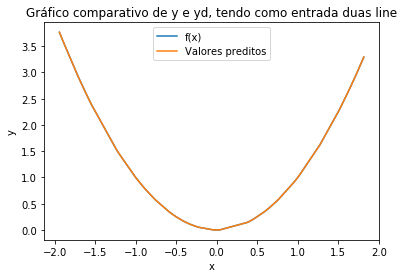

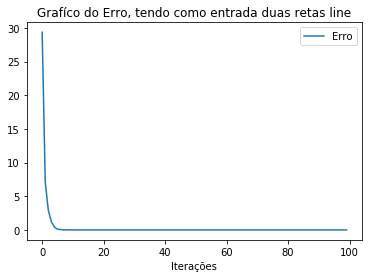

Reta 1 - a = -0.25, b = 0.5.
Reta 2 - a = 0.25, b = 0.5.


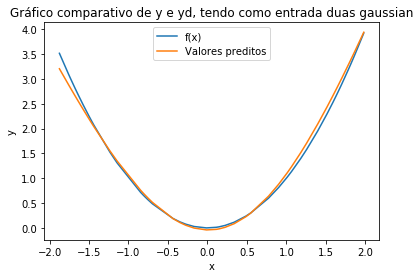

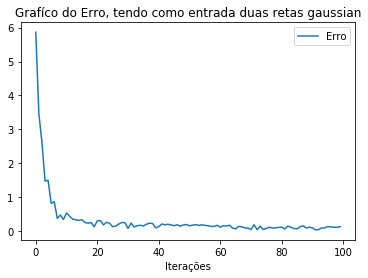

Guassiana 1 - mu = -1.6742340127637447, sigma = 2.158830408201598.
Guassiana 2 - mu = 2.266937108171173, sigma = 2.1392544212224416.


In [30]:
domain = (-2, 2)
input_size = 50
learning_rate = 0.1
yRange = (-2, 2)
iteration = 100

input1Rate = (-1, 1)
input2Rate = (-1, 1)

gdRetas = GradientDescent(domain, input_size, learning_rate, yRange, iteration,"line",input1Rate,input2Rate)
gdRetas.run()
print("Reta 1 - a = "+str(gdRetas.funcPert1.a)+ ", b = "+str(gdRetas.funcPert1.b)+".")
print("Reta 2 - a = "+str(gdRetas.funcPert2.a)+ ", b = "+str(gdRetas.funcPert2.b)+".")

input1Rate = (-2, 2)
input2Rate = (0, 4)

gdGuassianas = GradientDescent(domain, input_size, learning_rate, yRange, iteration,"gaussian",input1Rate,input2Rate)
gdGuassianas.run()
print("Guassiana 1 - mu = "+str(gdGuassianas.funcPert1.mu)+ ", sigma = "+str(gdGuassianas.funcPert1.sigma)+".")
print("Guassiana 2 - mu = "+str(gdGuassianas.funcPert2.mu)+ ", sigma = "+str(gdGuassianas.funcPert2.sigma)+".")

## Resultados
<p>
Como era esperado, ao utilizar duas retas como funções de pertinência, a predição é extremamente precisa. Em contraponto, ao utilizar duas gaussianas como funçoes de pertinência, a predição não é precisa.
</p>
<p>
Foi utiliza a atualização de <em>p</em>, <em>q</em> e os paramêtros das funções de pertinência a cada valor de entrada, pois o resultado de se atualizá-los a cada iteração não foi tão bom como o usado.
</p>
<p>
O valores da funções de pertinências da retas foram definidos de maneira fixa porque não foram obtidos resultados bons com os mesmos variando. Isso pode dar-se-á em função de cálculo errado das derivadas de/da e de/db.
</p>